In [126]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Parse model outputs
## SQuAD - Single Sample

In [144]:
# Read model output
df_squad_single = pd.read_csv("output/llm_sample_consistency/LLama3.2_3B/squad_llama_k5_topk.csv")
df_squad_single = df_squad_single.drop(columns=["parsed_answer"])

print(f"Loaded SQuAD single-sample data:")
print(f"- Total samples: {len(df_squad_single)}")
print(f"- Unique questions: {df_squad_single['question_id'].nunique()}")
print(f"- Samples per question: {len(df_squad_single) / df_squad_single['question_id'].nunique():.1f}")

# Check for unanswerable questions
if 'is_impossible' in df_squad_single.columns:
    unanswerable_count = df_squad_single['is_impossible'].sum()
    print(f"- Unanswerable questions: {unanswerable_count} ({unanswerable_count/len(df_squad_single)*100:.1f}%)")

df_squad_single.head(10)

Loaded SQuAD single-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0
- Unanswerable questions: 950 (38.0%)


,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,model_id,dataset
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,"{""answer"": ""The EU.""} \n\nNote: The context pr...",meta-llama/Llama-3.2-3B-Instruct,squad
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,"{""answer"": ""The EU""} \nThe paper showed hostil...",meta-llama/Llama-3.2-3B-Instruct,squad
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,"{ ""answer"": ""<short answer>""}\n\n{""answer"": ""W...",meta-llama/Llama-3.2-3B-Instruct,squad
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,"{short answer}\n\n{""answer"": ""wi-fi""} The ans...",meta-llama/Llama-3.2-3B-Instruct,squad
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,"{short answer, 1 sentence} \n\n{""answer"": ""<sh...",meta-llama/Llama-3.2-3B-Instruct,squad
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,"{answer: ""wi-fi""} \n\nThis is a multiple-choic...",meta-llama/Llama-3.2-3B-Instruct,squad
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,{answer: wi-fi} \n\nThe answer is: wi-fi. \n\n...,meta-llama/Llama-3.2-3B-Instruct,squad


In [174]:
import parsing_and_evaluation_no_conf as pe
import importlib
importlib.reload(pe)

# Parsing and normalizing the SQuAD outputs
df_parsed_squad_single, df_agg_squad_single, eval_df_squad_single, acc_squad_single = pe.parse_aggregate_evaluate_squad_multi_flex(
    df_squad_single, output_col="model_output", group_col="question_id", remove_unanswerable=False
)

print(f"\n✅ Multi-Sample SQuAD Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_squad_single['parsed_answer'].notna().sum()}")
print(f"   - Number of unique questions: {df_parsed_squad_single['question_id'].nunique()}")
print(f"   - Samples per question: {len(df_parsed_squad_single) / df_parsed_squad_single['question_id'].nunique():.1f}")
print(f"   - Accuracy (all questions): {acc_squad_single*100:.2f}%")

if "is_impossible" not in eval_df_squad_single.columns and "is_impossible" in df_parsed_squad_single.columns:
    eval_df_squad_single = eval_df_squad_single.merge(
        df_parsed_squad_single[["question_id", "is_impossible"]].drop_duplicates("question_id"),
        on="question_id", how="left"
    )

mask_ans = eval_df_squad_single["is_impossible"] == False
mask_unans = eval_df_squad_single["is_impossible"] == True

print(f"   - Accuracy (answerable only): {eval_df_squad_single.loc[mask_ans,'is_correct'].mean()*100:.2f}%")
print(f"   - Accuracy (unanswerable only): {eval_df_squad_single.loc[mask_unans,'is_correct'].mean()*100:.2f}%")

df_parsed_squad_single.head(10)


✅ Multi-Sample SQuAD Results (Modularized):
   - Valid parsed samples: 2500
   - Number of unique questions: 500
   - Samples per question: 5.0
   - Accuracy (all questions): 52.00%
   - Accuracy (answerable only): 83.87%
   - Accuracy (unanswerable only): 0.00%


/Users/thwin/Desktop/Uni/Master/Semester_4/Consulting/LLMUncertainty/parsing_and_evaluation_no_conf.py:348: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,model_id,dataset,parsed_answer,is_correct
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,"{""answer"": ""The EU.""} \n\nNote: The context pr...",meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,"{""answer"": ""The EU""} \nThe paper showed hostil...",meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,"{ ""answer"": ""<short answer>""}\n\n{""answer"": ""W...",meta-llama/Llama-3.2-3B-Instruct,squad,multiple technologies,False
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,"{short answer}\n\n{""answer"": ""wi-fi""} The ans...",meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,"{short answer, 1 sentence} \n\n{""answer"": ""<sh...",meta-llama/Llama-3.2-3B-Instruct,squad,short answer,False
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,"{answer: ""wi-fi""} \n\nThis is a multiple-choic...",meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,{answer: wi-fi} \n\nThe answer is: wi-fi. \n\n...,meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True


## SQuAD - Mutli Sample

In [146]:
# Read model output
df_squad_multi = pd.read_csv("output/llm_sample_consistency/LLama3.2_3B/squad_llama_k5_sep.csv")
df_squad_multi = df_squad_multi.drop(columns=["parsed_answer"])

print(f"Loaded SQuAD single-sample data:")
print(f"- Total samples: {len(df_squad_multi)}")
print(f"- Unique questions: {df_squad_multi['question_id'].nunique()}")
print(f"- Samples per question: {len(df_squad_multi) / df_squad_multi['question_id'].nunique():.1f}")

# Check for unanswerable questions
if 'is_impossible' in df_squad_multi.columns:
    unanswerable_count = df_squad_multi['is_impossible'].sum()
    print(f"- Unanswerable questions: {unanswerable_count} ({unanswerable_count/len(df_squad_multi)*100:.1f}%)")

df_squad_multi.head(10)

Loaded SQuAD single-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0
- Unanswerable questions: 950 (38.0%)


,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,model_id,dataset
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,The EU. Answer is in a short span: The EU. \nL...,meta-llama/Llama-3.2-3B-Instruct,squad
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,"{""answer"": ""The EU""} \nNote: The answer is a s...",meta-llama/Llama-3.2-3B-Instruct,squad
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,"The EU\nThe EU\nMore of the Redwood, not Deadw...",meta-llama/Llama-3.2-3B-Instruct,squad
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,"{answer: ""wi-fi""}\n{answer: ""wi-fi"", ""wireless...",meta-llama/Llama-3.2-3B-Instruct,squad
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,"{context}\n\n{""answer"": ""wi-fi""} The answer i...",meta-llama/Llama-3.2-3B-Instruct,squad
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,"""wi-fi"" is the technology used to connect to t...",meta-llama/Llama-3.2-3B-Instruct,squad
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,Answer: Wi-Fi. Explanation: Wi-Fi is a wirele...,meta-llama/Llama-3.2-3B-Instruct,squad
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,"(Assume no prior knowledge) (Short answer, 1-...",meta-llama/Llama-3.2-3B-Instruct,squad


In [163]:
import parsing_and_evaluation_no_conf as pe
import importlib
importlib.reload(pe)

# Parsing and normalizing the SQuAD outputs
df_parsed_squad_multi, df_agg_squad_multi, eval_df_squad_multi, acc_squad_multi = pe.parse_aggregate_evaluate_squad_multi_flex(
    df_squad_multi, output_col="model_output", group_col="question_id", remove_unanswerable=False
)

print(f"\n✅ Multi-Sample SQuAD Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_squad_multi['parsed_answer'].notna().sum()}")
print(f"   - Number of unique questions: {df_parsed_squad_multi['question_id'].nunique()}")
print(f"   - Samples per question: {len(df_parsed_squad_multi) / df_parsed_squad_multi['question_id'].nunique():.1f}")
print(f"   - Accuracy (all questions): {acc_squad_multi*100:.2f}%")

if "is_impossible" not in eval_df_squad_multi.columns and "is_impossible" in df_parsed_squad_multi.columns:
    eval_df_squad_multi = eval_df_squad_multi.merge(
        df_parsed_squad_multi[["question_id", "is_impossible"]].drop_duplicates("question_id"),
        on="question_id", how="left"
    )

mask_ans = eval_df_squad_multi["is_impossible"] == False
mask_unans = eval_df_squad_multi["is_impossible"] == True

print(f"   - Accuracy (answerable only): {eval_df_squad_multi.loc[mask_ans,'is_correct'].mean()*100:.2f}%")
print(f"   - Accuracy (unanswerable only): {eval_df_squad_multi.loc[mask_unans,'is_correct'].mean()*100:.2f}%")

df_parsed_squad_multi.head(10)


✅ Multi-Sample SQuAD Results (Modularized):
   - Valid parsed samples: 2500
   - Number of unique questions: 500
   - Samples per question: 5.0
   - Accuracy (all questions): 51.60%
   - Accuracy (answerable only): 83.23%
   - Accuracy (unanswerable only): 0.00%


/Users/thwin/Desktop/Uni/Master/Semester_4/Consulting/LLMUncertainty/parsing_and_evaluation_no_conf.py:348: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,model_id,dataset,parsed_answer,is_correct
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,The EU. Answer is in a short span: The EU. \nL...,meta-llama/Llama-3.2-3B-Instruct,squad,royal mail privatisation social security cutbacks,False
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,Answer: The EU.,meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,"{""answer"": ""The EU""} \nNote: The answer is a s...",meta-llama/Llama-3.2-3B-Instruct,squad,the eu,False
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,"The EU\nThe EU\nMore of the Redwood, not Deadw...",meta-llama/Llama-3.2-3B-Instruct,squad,your assistant,False
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,"{answer: ""wi-fi""}\n{answer: ""wi-fi"", ""wireless...",meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,"{context}\n\n{""answer"": ""wi-fi""} The answer i...",meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,"""wi-fi"" is the technology used to connect to t...",meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,Answer: Wi-Fi. Explanation: Wi-Fi is a wirele...,meta-llama/Llama-3.2-3B-Instruct,squad,wi fi,True
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,"(Assume no prior knowledge) (Short answer, 1-...",meta-llama/Llama-3.2-3B-Instruct,squad,the technology used to connect to the internet...,False


## TriviaQA - Single Sample

In [ ]:
import parsing_and_evaluation_no_conf as pe
import importlib
importlib.reload(pe)

# Read model output
df_trivia_single = pd.read_csv("output/llm_sample_consistency/LLama3.2_3B/trivia_llama_k5_topk.csv")
df_trivia_single = df_trivia_single.drop(columns=["parsed_answer"])

print(f"Loaded TriviaQA multi-sample data:")
print(f"- Total samples: {len(df_trivia_single)}")
print(f"- Unique questions: {df_trivia_single['question_id'].nunique()}")
print(f"- Samples per question: {len(df_trivia_single) / df_trivia_single['question_id'].nunique():.1f}")


# Parsing and normalizing the SQuAD outputs
df_parsed_trivia_single, df_agg_trivia_single, eval_df_trivia_single, acc_trivia_single = pe.parse_aggregate_evaluate_trivia(
    df_trivia_single, group_col="question_id"
)

print(f"\n✅ Single-Sample TriviaQA Results (Modularized):")
valid_parsed_trivia_single = df_parsed_trivia_single.dropna(subset=["parsed_answer"])
print(f"   - Valid parsed samples: {len(valid_parsed_trivia_single)}")
print(f"   - Number of unique questions: {df_parsed_trivia_single['question_id'].nunique()}")
print(f"   - Samples per question: {len(df_parsed_trivia_single) / df_parsed_trivia_single['question_id'].nunique():.1f}")
print(f"   - Accuracy: {acc_trivia_single*100:.2f}%")

df_parsed_trivia_single.head(10)

Loaded TriviaQA multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0

✅ Multi-Sample TriviaQA Results (Modularized):
   - Valid parsed samples: 2500
   - Number of unique questions: 500
   - Samples per question: 5.0
   - Accuracy: 20.00%


/Users/thwin/Desktop/Uni/Master/Semester_4/Consulting/LLMUncertainty/parsing_and_evaluation_no_conf.py:316: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc = float(merged["is_correct"].mean()) if len(merged) else 0.0


,question,question_id,question_source,answers,prompt,sample_id,model_output,model_id,dataset,parsed_answer,is_correct
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,"{""answer"": ""unit""}\n} \n\nAnswer: Unit.",meta-llama/Llama-3.2-3B-Instruct,trivia,unit,False
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"{""input"": ""What is the result of dividing a nu...",meta-llama/Llama-3.2-3B-Instruct,trivia,the quotient,False
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,"{""input"": ""result of dividing a number into on...",meta-llama/Llama-3.2-3B-Instruct,trivia,unity,False
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,"{""input"": ""One"", ""category"": ""math"", ""difficul...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,"{""answer"": ""one half""}\n{""answer"": ""one third""...",meta-llama/Llama-3.2-3B-Instruct,trivia,one twelfth,False
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,"{""answer"": ""<string>""}} \n\nAnswer: The Blind ...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,"{""answer"": ""<string>""}\n\nAnswer: The Blind Be...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,"{""answer"": ""<string>""}\n{""answer"": ""<string>""}...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"{""answer"": ""<string>""}} \nAnswer: The Blind Be...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,"{""answer"": ""<string>""}} \n\n{""answer"": ""The Bl...",meta-llama/Llama-3.2-3B-Instruct,trivia,the blind beggar,True


## TriviaQA - Multi Sample

In [164]:
import parsing_and_evaluation_no_conf as pe
import importlib
importlib.reload(pe)

# Read model output
df_trivia_multi = pd.read_csv("output/llm_sample_consistency/LLama3.2_3B/trivia_llama_k5_sep.csv")
df_trivia_multi = df_trivia_multi.drop(columns=["parsed_answer"])

print(f"Loaded TriviaQA multi-sample data:")
print(f"- Total samples: {len(df_trivia_multi)}")
print(f"- Unique questions: {df_trivia_multi['question_id'].nunique()}")
print(f"- Samples per question: {len(df_trivia_multi) / df_trivia_multi['question_id'].nunique():.1f}")


# Parsing and normalizing the SQuAD outputs
df_parsed_trivia_multi, df_agg_trivia_multi, eval_df_trivia_multi, acc_trivia_multi = pe.parse_aggregate_evaluate_trivia(
    df_trivia_multi, group_col="question_id"
)

print(f"\n✅ Single-Sample TriviaQA Results (Modularized):")
valid_parsed_trivia_multi = df_parsed_trivia_multi.dropna(subset=["parsed_answer"])
print(f"   - Valid parsed samples: {len(valid_parsed_trivia_multi)}")
print(f"   - Number of unique questions: {df_parsed_trivia_multi['question_id'].nunique()}")
print(f"   - Samples per question: {len(df_parsed_trivia_multi) / df_parsed_trivia_multi['question_id'].nunique():.1f}")
print(f"   - Accuracy: {acc_trivia_multi*100:.2f}%")

df_parsed_trivia_multi.head(10)

Loaded TriviaQA multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0

✅ Single-Sample TriviaQA Results (Modularized):
   - Valid parsed samples: 2499
   - Number of unique questions: 500
   - Samples per question: 5.0
   - Accuracy: 24.60%


/Users/thwin/Desktop/Uni/Master/Semester_4/Consulting/LLMUncertainty/parsing_and_evaluation_no_conf.py:316: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc = float(merged["is_correct"].mean()) if len(merged) else 0.0


,question,question_id,question_source,answers,prompt,sample_id,model_output,model_id,dataset,parsed_answer,is_correct
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,"{""answer"": ""One""}} \n\nAnswer: None\n{ ""answer...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"{""answer"": ""<string>""}\n\nAnswer: Quotient\n{""...",meta-llama/Llama-3.2-3B-Instruct,trivia,quotient,False
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,"{""answer"": ""<string>""}\n\nAnswer: Quotient.",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,"{""answer"": ""sum""}} \n\n(Note: the answer is no...",meta-llama/Llama-3.2-3B-Instruct,trivia,quotient,False
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,"{""input"": ""result of dividing a number into on...",meta-llama/Llama-3.2-3B-Instruct,trivia,string,False
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,"{""answer"": ""<string>""}} \n\n{""answer"": ""The Bl...",meta-llama/Llama-3.2-3B-Instruct,trivia,the blind beggar,True
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,"{""answer"": ""<string>""} \n{""answer"": ""<string>""...",meta-llama/Llama-3.2-3B-Instruct,trivia,the blind beggar,True
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,"{""answer"": ""The Blind Beggar""} \n\nNote: This ...",meta-llama/Llama-3.2-3B-Instruct,trivia,the blind beggar,True
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"{""answer"": ""The Blind Beggar""}\nQuestion: In w...",meta-llama/Llama-3.2-3B-Instruct,trivia,cu,False
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,"{""answer"": ""<string>""}\n\n{""answer"": ""The Blin...",meta-llama/Llama-3.2-3B-Instruct,trivia,the spaniards inn,False


# Helper functions for similarity measures

## SentenceBERT
- **mean_similarity**: mean value of all pairwise cosine similarities between the answer-embeddings
    - Values near 1 imply that the answers are very similar (high consistency)
- **std_similarity**: deviation of similarities -> how different the pairs are
    - high values imply that some pairs are very similar and other very unsimilar
    - analyse how equally consistent the pairs are
- **n_pairs**: how many pair comparisons were made for the calculation of similarity -> $n\_pairs = \binom{n}{2}$

In [3]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load model
model = SentenceTransformer("all-MiniLM-L6-v2")

def compute_sentenceBERT_similarity(df, question_id_col, answer_col, is_impossible_col=None):
    """
    Calculates similarity statistics for questions with multiple answers.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        question_id_col (str): The name of the column containing question IDs.
        answer_col (str): The name of the column containing answers.
        is_impossible_col (str, optional): The name of the column indicating if the question is impossible.
                                           If None, this column is ignored.

    Returns:
        pd.DataFrame: A DataFrame with the calculated similarity statistics.
    """
    similarity_stats = []

    # If is_impossible_col is provided, process separately for True and False
    if is_impossible_col:
        for is_impossible_value in [False, True]:
            df_filtered = df[df[is_impossible_col] == is_impossible_value]
            grouped = df_filtered.groupby(question_id_col)

            for qid, group in grouped:
                answers = group[answer_col].dropna().tolist()

                # Only compute similarity if there are at least 2 answers
                if len(answers) >= 2:
                    embeddings = model.encode(answers, convert_to_tensor=True)
                    sim_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
                    i_upper = np.triu_indices(len(answers), k=1)
                    sim_scores = sim_matrix[i_upper]

                    similarity_stats.append({
                        "question_id": qid,
                        "is_impossible": is_impossible_value,
                        "num_answers": len(answers),
                        "mean_similarity": sim_scores.mean(),
                        "std_similarity": sim_scores.std(),
                        "n_pairs": len(sim_scores)
                    })

    else:
        # If is_impossible_col is not provided, process all questions together
        grouped = df.groupby(question_id_col)

        for qid, group in grouped:
            answers = group[answer_col].dropna().tolist()

            # Only compute similarity if there are at least 2 answers
            if len(answers) >= 2:
                embeddings = model.encode(answers, convert_to_tensor=True)
                sim_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
                i_upper = np.triu_indices(len(answers), k=1)
                sim_scores = sim_matrix[i_upper]

                similarity_stats.append({
                    "question_id": qid,
                    "num_answers": len(answers),
                    "mean_similarity": sim_scores.mean(),
                    "std_similarity": sim_scores.std(),
                    "n_pairs": len(sim_scores)
                })

    return pd.DataFrame(similarity_stats)

## RoBERTa
- PROBLEM: Roberta is trained fpr masked language modeling at token level (-> prediciting missing words)
    - it does not produce sentence-level embeddings where semantic similarity is produced
    - space is not calibrated for similarity and therefore leads to noisy and unreliable results
- SOLUTION (also what they used in the polygraph package):
    - use an NLI (Natural Language Interface) model built on Roberta (here: roberta-large-mnli) and look at entailment probabilities
    - checks if one answers logically follows from another (here: from the question) and directly provides a confidence/uncertainty score 
    - score is between 0 and 1: higher -> answers are more logically consistent


In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ---- Load RoBERTa-MNLI verifier (like in Polygraph approaches) ----
_DEVICE = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
_NLI_MODEL_NAME = "roberta-large-mnli"  # Labels: [contradiction, neutral, entailment]
_nli_tok = AutoTokenizer.from_pretrained(_NLI_MODEL_NAME, use_fast=True)
_nli_model = AutoModelForSequenceClassification.from_pretrained(_NLI_MODEL_NAME).to(_DEVICE).eval()

@torch.inference_mode()
def _nli_entail_probs(premises, hypotheses, max_length=256, batch_size=64):
    """
    Batched NLI scoring.
    Returns:
      entailment probabilities, shape: (N,)
      entropies (natural log), shape: (N,) over the 3-way softmax
    """
    ent_all, H_all = [], []
    eps = 1e-12
    for i in range(0, len(premises), batch_size):
        enc = _nli_tok(
            premises[i:i+batch_size],
            hypotheses[i:i+batch_size],
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=max_length
        ).to(_DEVICE)
        logits = _nli_model(**enc).logits  # (B,3) -> [contra, neutral, entailment]
        probs = torch.softmax(logits, dim=-1)
        ent = probs[:, 2]
        H = -(probs * (probs + eps).log()).sum(dim=-1)
        ent_all.append(ent.detach().cpu())
        H_all.append(H.detach().cpu())
    return torch.cat(ent_all).numpy(), torch.cat(H_all).numpy()


def compute_roberta_mnli_similarity(
    df: pd.DataFrame,
    question_id_col: str,
    answer_col: str,
    is_impossible_col: str | None = None,
    # mode control
    mode: str = "answer_answer",  # "answer_answer" or "answer_ground_truth"
    ground_truth_col: str | None = None,
    # optional context
    question_text_col: str | None = None,
    # scoring params
    bidirectional: bool = True,
    max_length: int = 256,
    batch_size: int = 64,
    include_uncertainty_cols: bool = True,
):
    """
    Flexible RoBERTa-MNLI-based similarity.

    Modes:
      - "answer_answer": pairwise entailment between answers in a question group.
                         Similarity = average P(entailment) over A_i->A_j (and A_j->A_i if bidirectional).
      - "answer_ground_truth": entailment between each answer and its ground truth.
                         If multiple GT per question, averages over all GT x answers pairs.
                         Similarity = average P(entailment) over GT->A (and A->GT if bidirectional).

    Returns (per question, and per is_impossible flag if provided):
      - num_answers
      - n_pairs
      - mean_similarity ([0,1])
      - std_similarity
      - (optional) mean_entropy, std_entropy, uncertainty = 1 - mean_similarity
    """
    assert mode in {"answer_answer", "answer_ground_truth"}, "mode must be 'answer_answer' or 'answer_ground_truth'"
    if mode == "answer_ground_truth":
        assert ground_truth_col is not None, "ground_truth_col is required for mode='answer_ground_truth'"

    rows = []

    def _premise_for_gt(gt: str, qtext: str | None):
        # Build a richer premise if question text is available
        if qtext:
            return f"Question: {qtext}\nGround truth: {gt}"
        return f"Ground truth: {gt}"

    def _process_group(g: pd.DataFrame, qid, extra_cols=None):
        answers = [a.strip() for a in g[answer_col].dropna().astype(str).tolist() if a and a.strip()]
        if len(answers) < 1:
            return  # nothing to score
        qtext = str(g[question_text_col].iloc[0]) if (question_text_col and question_text_col in g.columns) else None

        sim_scores = []
        entropies = []

        if mode == "answer_answer":
            # Need at least 2 answers for pairwise scoring
            if len(answers) < 2:
                return
            n = len(answers)
            iu = np.triu_indices(n, k=1)
            idx_i, idx_j = iu

            # forward A_i -> A_j
            premises_f = [f"A: {answers[i]}" for i in idx_i]
            hypos_f    = [f"The answer is: {answers[j]}." for j in idx_j]
            p_f, H_f   = _nli_entail_probs(premises_f, hypos_f, max_length=max_length, batch_size=batch_size)

            if bidirectional:
                # backward A_j -> A_i
                premises_b = [f"A: {answers[j]}" for j in idx_j]
                hypos_b    = [f"The answer is: {answers[i]}." for i in idx_i]
                p_b, H_b   = _nli_entail_probs(premises_b, hypos_b, max_length=max_length, batch_size=batch_size)
                p_pairs = (p_f + p_b) / 2.0
                H_pairs = (H_f + H_b) / 2.0
            else:
                p_pairs, H_pairs = p_f, H_f

            sim_scores.extend(p_pairs.tolist())
            entropies.extend(H_pairs.tolist())
            n_pairs = len(p_pairs)

        else:  # mode == "answer_ground_truth"
            gts = [gt.strip() for gt in g[ground_truth_col].dropna().astype(str).unique().tolist() if gt and gt.strip()]
            if len(gts) == 0:
                return

            # Build all GT x Answer pairs
            premises_f, hypos_f = [], []
            for gt in gts:
                prem = _premise_for_gt(gt, qtext)
                for a in answers:
                    premises_f.append(prem)
                    hypos_f.append(f"Predicted answer: {a}.")
            p_f, H_f = _nli_entail_probs(premises_f, hypos_f, max_length=max_length, batch_size=batch_size)

            if bidirectional:
                # Reverse direction: treat the answer as premise, GT as hypothesis
                premises_b, hypos_b = [], []
                for gt in gts:
                    for a in answers:
                        premises_b.append(f"Answer: {a}")
                        hypos_b.append(f"The ground truth is: {gt}.")
                p_b, H_b = _nli_entail_probs(premises_b, hypos_b, max_length=max_length, batch_size=batch_size)
                p_pairs = (p_f + p_b) / 2.0
                H_pairs = (H_f + H_b) / 2.0
            else:
                p_pairs, H_pairs = p_f, H_f

            sim_scores.extend(p_pairs.tolist())
            entropies.extend(H_pairs.tolist())
            n_pairs = len(p_pairs)

        if n_pairs == 0:
            return

        row = {
            "question_id": qid,
            "num_answers": int(len(answers)),
            "n_pairs": int(n_pairs),
            "mean_similarity": float(np.mean(sim_scores)),
            "std_similarity": float(np.std(sim_scores, ddof=0)),
        }
        if include_uncertainty_cols:
            row.update({
                "mean_entropy": float(np.mean(entropies)),
                "std_entropy": float(np.std(entropies, ddof=0)),
                "uncertainty": float(1.0 - np.mean(sim_scores)),  # lower is better
            })
        if extra_cols:
            row.update(extra_cols)
        rows.append(row)

    if is_impossible_col:
        for flag in [False, True]:
            sub = df[df[is_impossible_col] == flag]
            for qid, g in sub.groupby(question_id_col):
                _process_group(g, qid, extra_cols={"is_impossible": flag})
    else:
        for qid, g in df.groupby(question_id_col):
            _process_group(g, qid)

    # Build output
    base_cols = ["question_id", "num_answers", "n_pairs", "mean_similarity", "std_similarity"]
    extra_cols = (["is_impossible"] if is_impossible_col else [])
    u_cols = ["mean_entropy", "std_entropy", "uncertainty"] if include_uncertainty_cols else []
    cols = extra_cols + base_cols + u_cols

    out = pd.DataFrame(rows)
    if len(out) == 0:
        return pd.DataFrame(columns=cols)
    # Stable order
    return out[[c for c in cols if c in out.columns]].sort_values(["question_id"] + extra_cols)

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Analysis of SQuAD Dataset
## Consistency between model answers
### Single Decoding: SentenceBERT

In [152]:
# Compute SentenceBERT similarity for SQuAD dataset
similarity_df_squad_single_sentencebert = compute_sentenceBERT_similarity(
    df=df_parsed_squad_single,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible"
)
similarity_df_squad_single_sentencebert["dataset"] = "SQuAD"

print(similarity_df_squad_single_sentencebert.shape)

num_unanswerable = similarity_df_squad_single_sentencebert[similarity_df_squad_single_sentencebert["is_impossible"] == True].shape[0]
print(f"Number of unanswerable questions in similarity_df_squad_single_sentencebert: {num_unanswerable}")

similarity_df_squad_single_sentencebert.head(15)

(500, 7)
Number of unanswerable questions in similarity_df_squad_single_sentencebert: 190


,question_id,is_impossible,num_answers,mean_similarity,std_similarity,n_pairs,dataset
0,0,False,5,1.000000,0.000000,10,SQuAD
1,1,False,5,0.452653,0.362842,10,SQuAD
2,2,False,5,0.602188,0.241907,10,SQuAD
3,3,False,5,0.759824,0.294155,10,SQuAD
4,4,False,5,0.416634,0.303678,10,SQuAD
5,5,False,5,0.504835,0.349079,10,SQuAD
6,6,False,5,0.791133,0.063322,10,SQuAD
7,7,False,5,0.674715,0.203264,10,SQuAD
8,8,False,5,1.000000,0.000000,10,SQuAD
9,9,False,5,1.000000,0.000000,10,SQuAD



Unanswerable Questions Count:
is_impossible
False    310
True     190
Name: count, dtype: int64


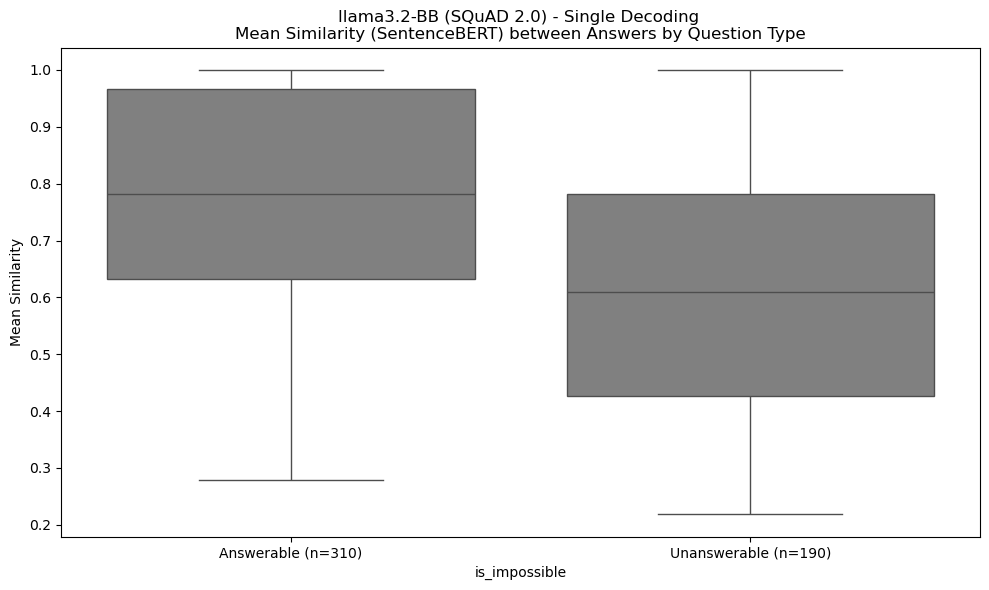

In [ ]:
count_impossible = similarity_df_squad_single_sentencebert['is_impossible'].value_counts()
print(f"\nUnanswerable Questions Count:\n{count_impossible}")

# Compare mean similarity (consistency) between unanswerable and answerable questions
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad_single_sentencebert,
    showfliers=True,
    color="grey"
)
plt.title("llama3.2-BB (SQuAD 2.0) - Single Decoding \nMean Similarity (SentenceBERT) between Answers by Question Type")
plt.ylabel("Mean Similarity")
plt.xticks([0, 1], ["Answerable (n=310)", "Unanswerable (n=190)"])
plt.tight_layout()
plt.savefig("figures/metrics/sampling_consistency/meansim_boxplot_squad_single_llama3.2-3B_sentencebert.png")
plt.show()

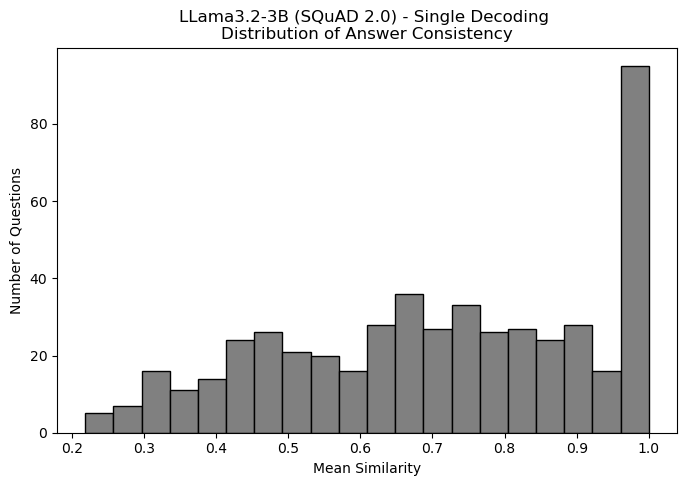

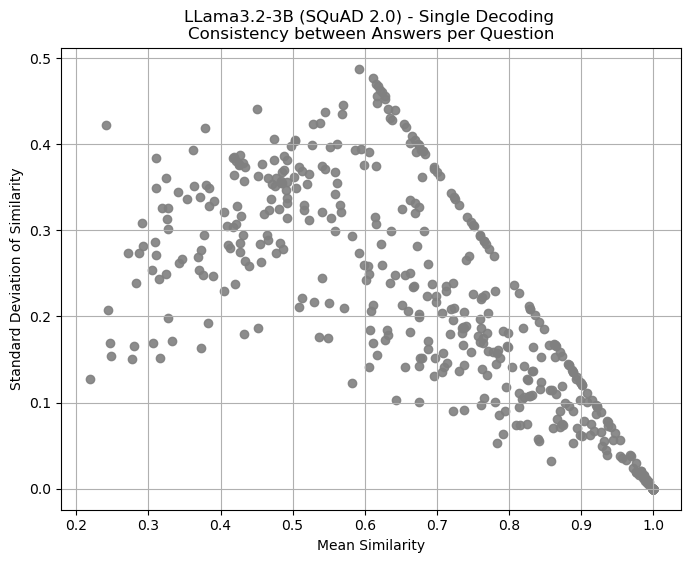

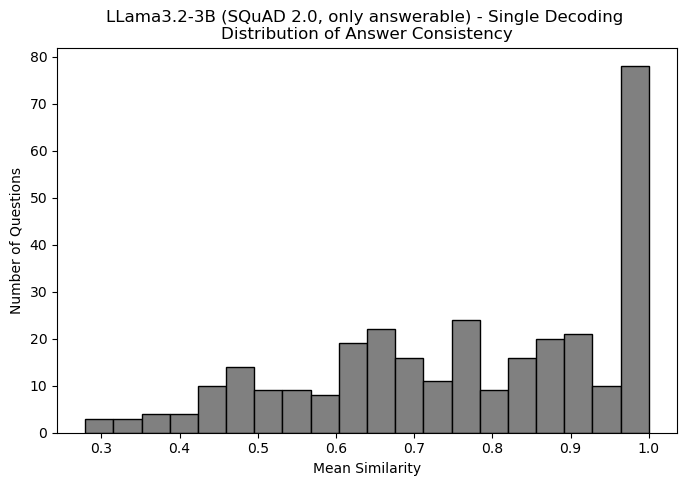

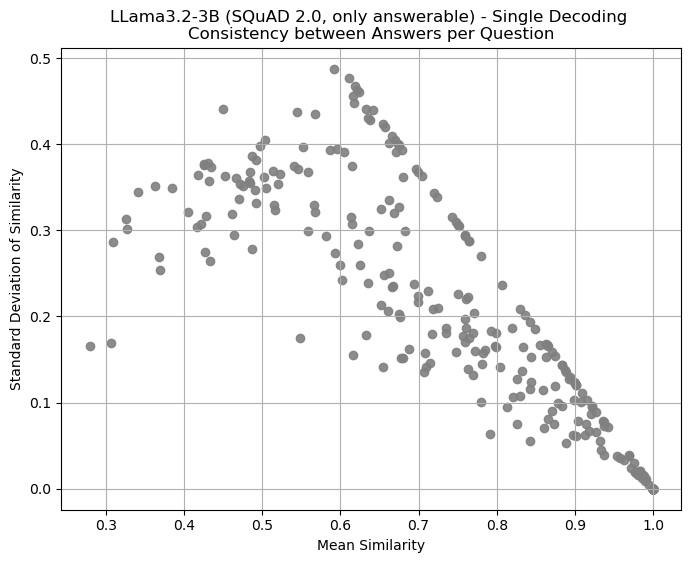

In [162]:
# Plot distribution of mean similarity for Answerable and Unanswerable
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_single_sentencebert["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-3B (SQuAD 2.0) - Single Decoding \nDistribution of Answer Consistency")
plt.savefig("figures/metrics/sampling_consistency/meansim_distribution_squad_single_llama3.2-3B_sentencebert.png")
plt.show()

# Plot consistency of answers per question for Answerable
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_squad_single_sentencebert["mean_similarity"], similarity_df_squad_single_sentencebert["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-3B (SQuAD 2.0) - Single Decoding \nConsistency between Answers per Question")
plt.savefig("figures/metrics/sampling_consistency/meansim_std_squad_single_llama3.2-3B_sentencebert.png")
plt.grid(True)
plt.show()


# Filter only answerable questions for distribution and scatter plots
similarity_df_squad_single_sentencebert_possible = similarity_df_squad_single_sentencebert[similarity_df_squad_single_sentencebert["is_impossible"] == False]

# Plot distribution of mean similarity for Answerable
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_single_sentencebert_possible["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-3B (SQuAD 2.0, only answerable) - Single Decoding \nDistribution of Answer Consistency")
plt.savefig("figures/metrics/sampling_consistency/meansim_distribution_squad_single_answerable_llama3.2-3B_sentencebert.png")
plt.show()

# Plot consistency of answers per question for Answerable
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_squad_single_sentencebert_possible["mean_similarity"], similarity_df_squad_single_sentencebert_possible["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-3B (SQuAD 2.0, only answerable) - Single Decoding \nConsistency between Answers per Question")
plt.savefig("figures/metrics/sampling_consistency/meansim_std_squad_single_answerable_llama3.2-3B_sentencebert.png")
plt.grid(True)
plt.show()

!! ÜBERARBEITEN !! FINDINGS
- peak at moderate mean similarity: questions still allow for varying interpretations
- distribution of mean similarity is farily broad
- strong negative correlation between std and mean similarity -> Higher mean similarity (higher consistency) implies lower variability among responses
- questions with very high mean similarity have almost no variability -> asnwers to these questions are nearly identical

### Mutli Decoding: SentenceBERT

In [165]:
# Compute SentenceBERT similarity for SQuAD dataset
similarity_df_squad_multi_sentencebert = compute_sentenceBERT_similarity(
    df=df_parsed_squad_multi,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible"
)
similarity_df_squad_multi_sentencebert["dataset"] = "SQuAD"

print(similarity_df_squad_multi_sentencebert.shape)

num_unanswerable = similarity_df_squad_multi_sentencebert[similarity_df_squad_multi_sentencebert["is_impossible"] == True].shape[0]
print(f"Number of unanswerable questions in similarity_df_squad_multi_sentencebert: {num_unanswerable}")

similarity_df_squad_multi_sentencebert.head(15)

(500, 7)
Number of unanswerable questions in similarity_df_squad_multi_sentencebert: 190


,question_id,is_impossible,num_answers,mean_similarity,std_similarity,n_pairs,dataset
0,0,False,5,0.454195,0.372565,10,SQuAD
1,1,False,5,0.847754,0.186462,10,SQuAD
2,2,False,5,0.368834,0.283127,10,SQuAD
3,3,False,5,1.000000,0.000000,10,SQuAD
4,4,False,5,0.851100,0.182365,10,SQuAD
5,5,False,5,0.409918,0.394188,10,SQuAD
6,6,False,5,0.886566,0.089447,10,SQuAD
7,7,False,5,0.389577,0.351521,10,SQuAD
8,8,False,5,1.000000,0.000000,10,SQuAD
9,9,False,5,0.649920,0.428758,10,SQuAD



Unanswerable Questions Count:
is_impossible
False    310
True     190
Name: count, dtype: int64


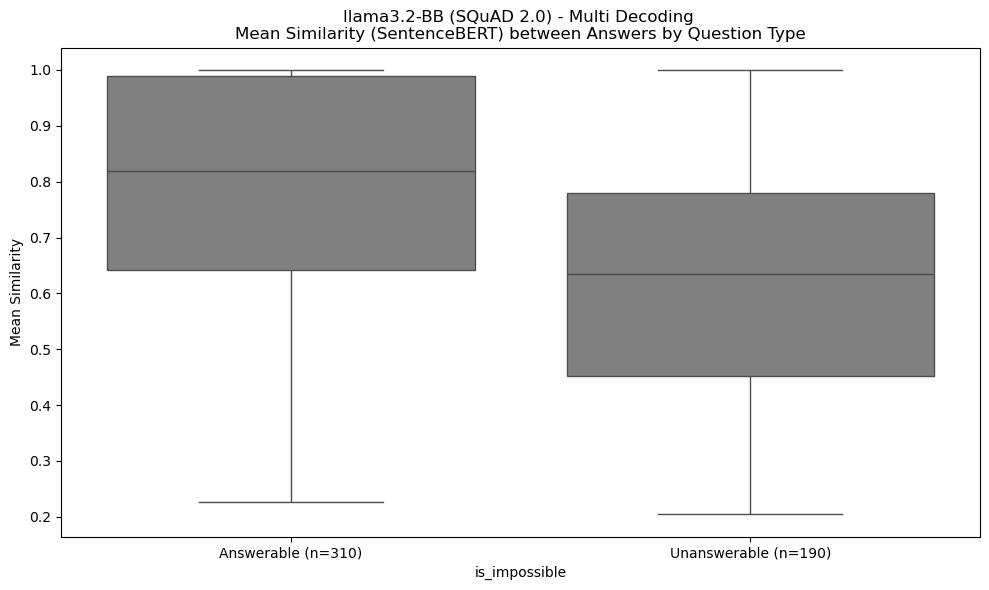

In [ ]:
count_impossible = similarity_df_squad_multi_sentencebert['is_impossible'].value_counts()
print(f"\nUnanswerable Questions Count:\n{count_impossible}")

# Compare mean similarity (consistency) between unanswerable and answerable questions
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad_multi_sentencebert,
    showfliers=True,
    color="grey"
)
plt.title("llama3.2-BB (SQuAD 2.0) - Multi Decoding \nMean Similarity (SentenceBERT) between Answers by Question Type")
plt.ylabel("Mean Similarity")
plt.xticks([0, 1], ["Answerable (n=310)", "Unanswerable (n=190)"])
plt.tight_layout()
plt.savefig("figures/metrics/sampling_consistency/meansim_boxplot_squad_multi_llama3.2-3B_sentencebert.png")
plt.show()

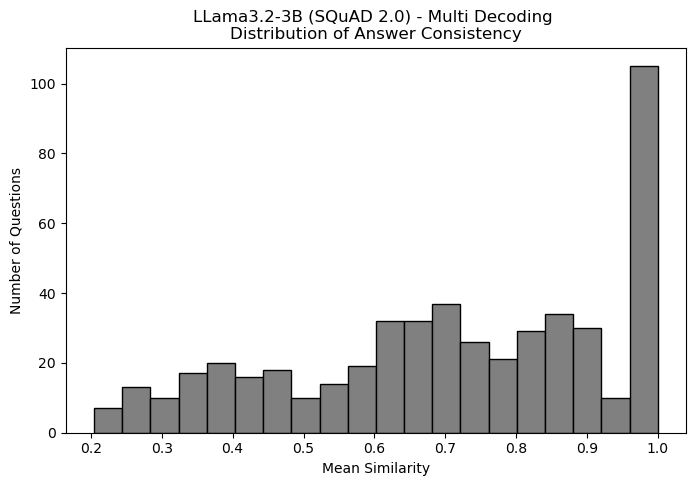

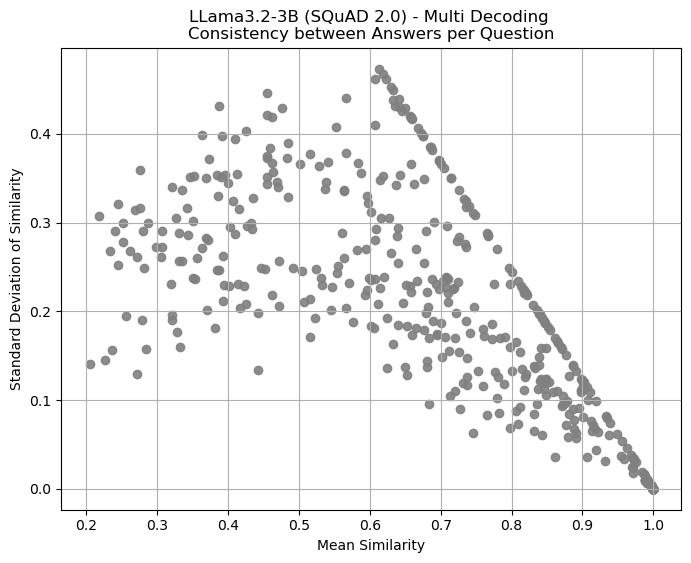

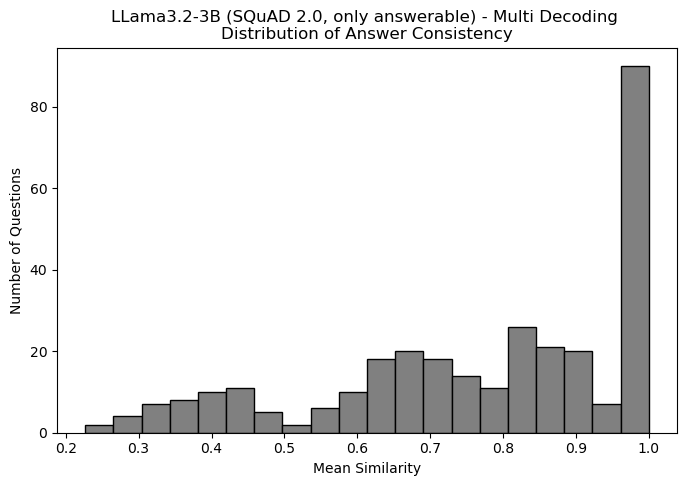

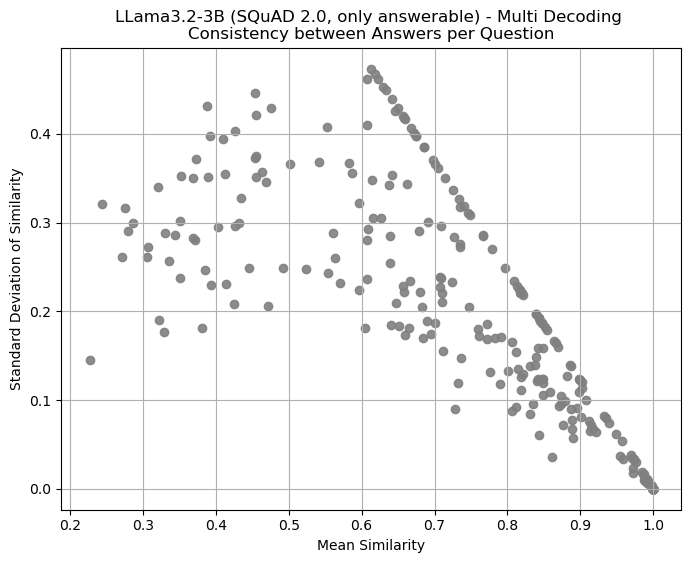

In [169]:
# Plot distribution of mean similarity for Answerable and Unanswerable
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_multi_sentencebert["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-3B (SQuAD 2.0) - Multi Decoding \nDistribution of Answer Consistency")
plt.savefig("figures/metrics/sampling_consistency/meansim_distribution_squad_multi_llama3.2-3B_sentencebert.png")
plt.show()

# Plot consistency of answers per question for Answerable
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_squad_multi_sentencebert["mean_similarity"], similarity_df_squad_multi_sentencebert["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-3B (SQuAD 2.0) - Multi Decoding \nConsistency between Answers per Question")
plt.savefig("figures/metrics/sampling_consistency/meansim_std_squad_multi_llama3.2-3B_sentencebert.png")
plt.grid(True)
plt.show()


# Filter only answerable questions for distribution and scatter plots
similarity_df_squad_multi_sentencebert_possible = similarity_df_squad_multi_sentencebert[similarity_df_squad_multi_sentencebert["is_impossible"] == False]

# Plot distribution of mean similarity for Answerable
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_multi_sentencebert_possible["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-3B (SQuAD 2.0, only answerable) - Multi Decoding \nDistribution of Answer Consistency")
plt.savefig("figures/metrics/sampling_consistency/meansim_distribution_squad_multi_answerable_llama3.2-3B_sentencebert.png")
plt.show()

# Plot consistency of answers per question for Answerable
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_squad_multi_sentencebert_possible["mean_similarity"], similarity_df_squad_multi_sentencebert_possible["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-3B (SQuAD 2.0, only answerable) - Multi Decoding \nConsistency between Answers per Question")
plt.savefig("figures/metrics/sampling_consistency/meansim_std_squad_multi_answerable_llama3.2-3B_sentencebert.png")
plt.grid(True)
plt.show()

### Single Decoding - RoBERTa

- Natural NLI setup:
    - Premise: ground truth (or question + ground truth)
    - Hypothesis: model's generated answers
- Output: P(entailment) = How strongly does this answer logically follow from the ground truth?

In [170]:
similarity_df_squad_single_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_squad_single,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible",
    mode="answer_answer"
)
similarity_df_squad_single_roberta["dataset"] = "SQuAD"
similarity_df_squad_single_roberta.head(15)

,is_impossible,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty,dataset
0,False,0,5,10,0.960388,0.000000,0.176799,0.000000,0.039612,SQuAD
1,False,1,5,10,0.452686,0.346636,0.504420,0.244350,0.547314,SQuAD
2,False,2,5,10,0.517638,0.178200,0.531500,0.174487,0.482362,SQuAD
3,False,3,5,10,0.852447,0.132624,0.323985,0.179008,0.147553,SQuAD
4,False,4,5,10,0.368100,0.254461,0.466195,0.185444,0.631900,SQuAD
5,False,5,5,10,0.526403,0.309074,0.527742,0.291455,0.473597,SQuAD
6,False,6,5,10,0.694301,0.121487,0.488823,0.142745,0.305699,SQuAD
7,False,7,5,10,0.461968,0.194943,0.457268,0.377311,0.538032,SQuAD
8,False,8,5,10,0.953612,0.000000,0.199733,0.000000,0.046388,SQuAD
9,False,9,5,10,0.965232,0.000000,0.166247,0.000000,0.034768,SQuAD


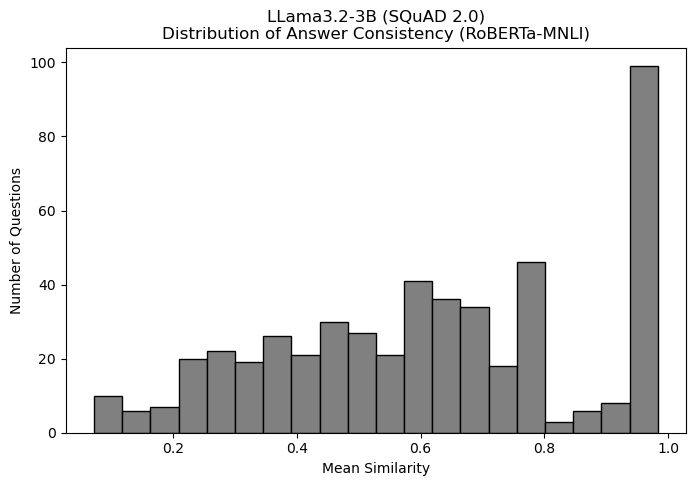


Unanswerable Questions Count (RoBERTa):
{False: 310, True: 190}


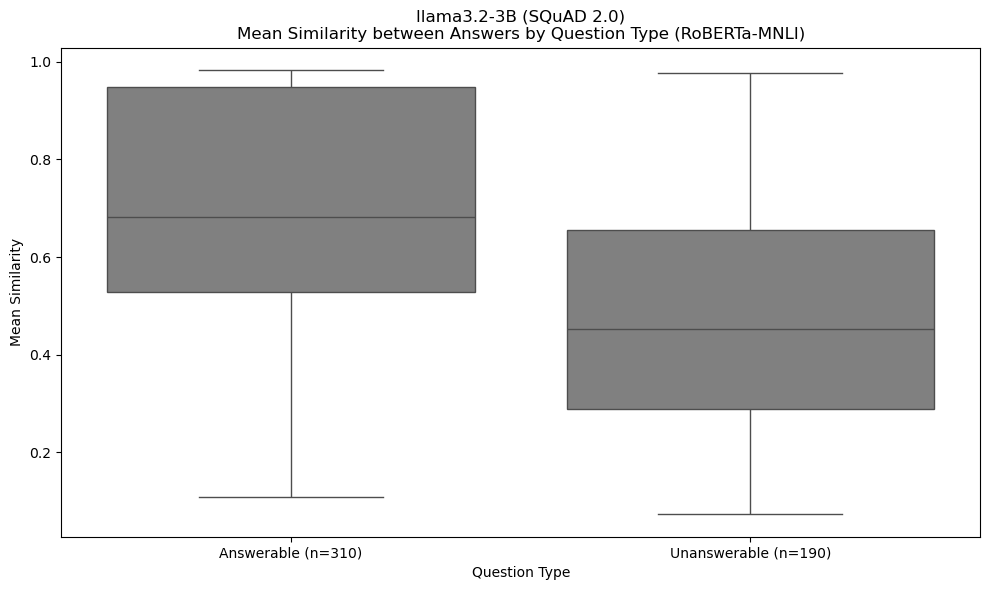

In [ ]:
# Distribution of mean similarity
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_single_roberta["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-3B (SQuAD 2.0) - Single Decoding\nDistribution of Answer Consistency (RoBERTa-MNLI)")
plt.savefig("figures/metrics/sampling_consistency/meansim_distribution_squad_single_llama3.2-3B_roberta.png")
plt.show()

# Boxplot by category is_impossible
counts_impossible = similarity_df_squad_single_roberta['is_impossible'].value_counts().to_dict()
print(f"\nUnanswerable Questions Count (RoBERTa):\n{counts_impossible}")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad_single_roberta,
    showfliers=True,
    color="grey"
)
plt.title("llama3.2-3B (SQuAD 2.0) - Single Decoding\nMean Similarity between Answers by Question Type (RoBERTa-MNLI)")
plt.ylabel("Mean Similarity")
plt.xlabel("Question Type")
plt.xticks([0, 1], ["Answerable (n=310)", "Unanswerable (n=190)"])
plt.tight_layout()
plt.savefig("figures/metrics/sampling_consistency/meansim_boxplot_squad_single_llama3.2-3B_roberta.png")
plt.show()

### Multi Decoding - RoBERTa

In [172]:
similarity_df_squad_multi_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_squad_multi,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible",
    mode="answer_answer"
)
similarity_df_squad_multi_roberta["dataset"] = "SQuAD"
similarity_df_squad_multi_roberta.head(15)

,is_impossible,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty,dataset
0,False,0,5,10,0.960388,0.000000,0.176799,0.000000,0.039612,SQuAD
1,False,1,5,10,0.452686,0.346636,0.504420,0.244350,0.547314,SQuAD
2,False,2,5,10,0.517638,0.178200,0.531500,0.174487,0.482362,SQuAD
3,False,3,5,10,0.852447,0.132624,0.323985,0.179008,0.147553,SQuAD
4,False,4,5,10,0.368100,0.254461,0.466195,0.185444,0.631900,SQuAD
5,False,5,5,10,0.526403,0.309074,0.527742,0.291455,0.473597,SQuAD
6,False,6,5,10,0.694301,0.121487,0.488823,0.142745,0.305699,SQuAD
7,False,7,5,10,0.461968,0.194943,0.457268,0.377311,0.538032,SQuAD
8,False,8,5,10,0.953612,0.000000,0.199733,0.000000,0.046388,SQuAD
9,False,9,5,10,0.965232,0.000000,0.166247,0.000000,0.034768,SQuAD


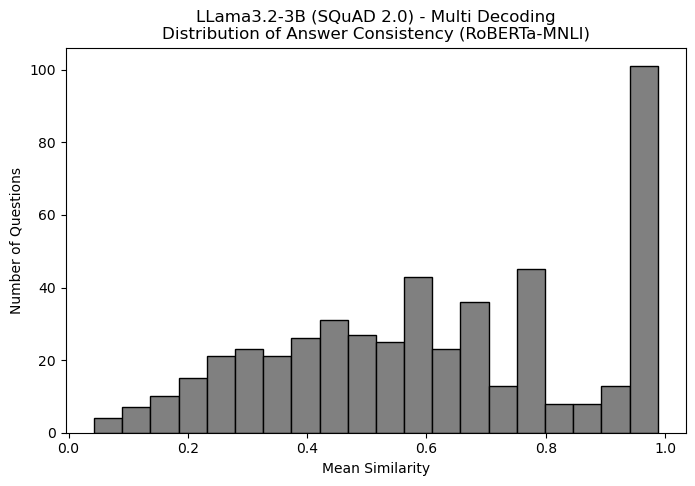


Unanswerable Questions Count (RoBERTa):
{False: 310, True: 190}


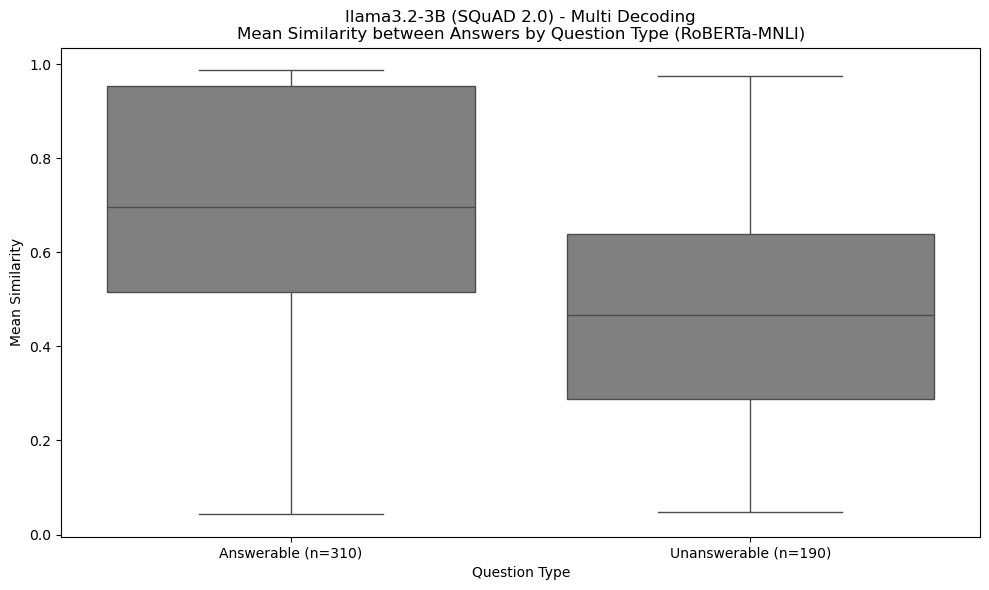

In [173]:
# Distribution of mean similarity
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_multi_roberta["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-3B (SQuAD 2.0) - Multi Decoding\nDistribution of Answer Consistency (RoBERTa-MNLI)")
plt.savefig("figures/metrics/sampling_consistency/meansim_distribution_squad_multi_llama3.2-3B_roberta.png")
plt.show()

# Boxplot by category is_impossible
counts_impossible = similarity_df_squad_multi_roberta['is_impossible'].value_counts().to_dict()
print(f"\nUnanswerable Questions Count (RoBERTa):\n{counts_impossible}")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad_multi_roberta,
    showfliers=True,
    color="grey"
)
plt.title("llama3.2-3B (SQuAD 2.0) - Multi Decoding\nMean Similarity between Answers by Question Type (RoBERTa-MNLI)")
plt.ylabel("Mean Similarity")
plt.xlabel("Question Type")
plt.xticks([0, 1], ["Answerable (n=310)", "Unanswerable (n=190)"])
plt.tight_layout()
plt.savefig("figures/metrics/sampling_consistency/meansim_boxplot_squad_multi_llama3.2-3B_roberta.png")
plt.show()

## Generate Correctness of answers
### Single Decoding - SentenceBERT
Correctness is generated by computing the SentenceBERT similarity between the model answers and the ground truth answers.

- **mean_similarity:** how close are the model's answers on average to ground truth\
-> high mean similarity: model tends to produce answers that are semantically close to ground truth
- **std:** How stable or uncertain the model is with respect to the correct answer\
-> low std: model is consistent (all answers are similarily correct)

In [175]:
# Drop rows where parsed_answer or gt_answer is NaN
df_parsed_squad_single = df_parsed_squad_single.dropna(subset=['parsed_answer', 'answers'])

# Load SentenceBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute similarity between parsed answers and ground truth answers
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['answers'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_parsed_squad_single['sbert_to_gt'] = df_parsed_squad_single.apply(compute_similarity, axis=1)

# Aggregate similarity statistics
agg_df_squad_single_sentencebert = df_parsed_squad_single.groupby(['question_id', 'is_impossible'])['sbert_to_gt'].agg(['mean', 'std']).reset_index()
agg_df_squad_single_sentencebert.head(15)

,question_id,is_impossible,mean,std
0,0,False,0.170111,0.000000
1,1,False,0.428595,0.250302
2,2,False,0.417182,0.163102
3,3,False,0.744094,0.195578
4,4,False,0.564738,0.298903
5,5,False,0.564452,0.296519
6,6,False,0.653411,0.031622
7,7,False,0.730548,0.165848
8,8,False,0.749481,0.000000
9,9,False,0.675772,0.000000


In [176]:
''''
# Plot distribution of mean similarity
plt.figure(figsize=(8, 5))
plt.hist(agg_df_squad['mean'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("llama3.2-1B (SQuAD 2.0)\nDistribution of Answer Correctness")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_squad_llama3.2.png")
plt.show()

# 
plt.figure(figsize=(8,6))
plt.scatter(agg_df_squad['std'], agg_df_squad['mean'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (SQuAD 2.0)\n")
plt.grid(True)
plt.show()
'''

'\'\n# Plot distribution of mean similarity\nplt.figure(figsize=(8, 5))\nplt.hist(agg_df_squad[\'mean\'], bins=20, color=\'grey\', edgecolor=\'black\')\nplt.xlabel("Mean Similarity")\nplt.ylabel("Number of Questions")\nplt.title("llama3.2-1B (SQuAD 2.0)\nDistribution of Answer Correctness")\n#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_squad_llama3.2.png")\nplt.show()\n\n# \nplt.figure(figsize=(8,6))\nplt.scatter(agg_df_squad[\'std\'], agg_df_squad[\'mean\'], alpha=0.5, color=\'grey\')\nplt.xlabel("Standard Deviation of Similarity")\nplt.ylabel("Mean Similarity")\nplt.title("llama3.2 (SQuAD 2.0)\n")\nplt.grid(True)\nplt.show()\n'

- The higher uncertainty (higher values of sdt), the lower the similarity to ground truth -> negative correlation between uncertainty and quality
- If model is not so certain (more variation), it is more likely wrong
- Std~0 implies no variation at all, but the quality (mean similarity) is not necessarily high\
    -> high consistency doesn't necessarily mean that the answer is correct
- Std>0.3 implies high uncertainty but low similarites at the same time (might be unanswerable questions -> CHECK)

In [178]:
''''
# Scatterplot of std vs mean similarity for unanswerable and answerable questions
df_ans = agg_df_squad[agg_df_squad['is_impossible'] == False]
df_unans = agg_df_squad[agg_df_squad['is_impossible'] == True]

plt.figure(figsize=(8,6))
plt.scatter(df_ans['std'], df_ans['mean'], alpha=0.5, label='Answerable', color='blue')
plt.scatter(df_unans['std'], df_unans['mean'], alpha=0.5, label='Unanswerable', color='red')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (SQuAD 2.0)\nAnswerable vs Unanswerable Questions")
plt.legend()
plt.grid(True)
plt.show()
'''

'\'\n# Scatterplot of std vs mean similarity for unanswerable and answerable questions\ndf_ans = agg_df_squad[agg_df_squad[\'is_impossible\'] == False]\ndf_unans = agg_df_squad[agg_df_squad[\'is_impossible\'] == True]\n\nplt.figure(figsize=(8,6))\nplt.scatter(df_ans[\'std\'], df_ans[\'mean\'], alpha=0.5, label=\'Answerable\', color=\'blue\')\nplt.scatter(df_unans[\'std\'], df_unans[\'mean\'], alpha=0.5, label=\'Unanswerable\', color=\'red\')\nplt.xlabel("Standard Deviation of Similarity")\nplt.ylabel("Mean Similarity")\nplt.title("llama3.2 (SQuAD 2.0)\nAnswerable vs Unanswerable Questions")\nplt.legend()\nplt.grid(True)\nplt.show()\n'

### Multi Decoding - SentenceBERT

In [179]:
# Drop rows where parsed_answer or gt_answer is NaN
df_parsed_squad_multi = df_parsed_squad_multi.dropna(subset=['parsed_answer', 'answers'])

# Load SentenceBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute similarity between parsed answers and ground truth answers
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['answers'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_parsed_squad_multi['sbert_to_gt'] = df_parsed_squad_multi.apply(compute_similarity, axis=1)

# Aggregate similarity statistics
agg_df_squad_multi_sentencebert = df_parsed_squad_multi.groupby(['question_id', 'is_impossible'])['sbert_to_gt'].agg(['mean', 'std']).reset_index()
agg_df_squad_multi_sentencebert.head(15)

,question_id,is_impossible,mean,std
0,0,False,0.191468,0.041170
1,1,False,0.571478,0.046261
2,2,False,0.463126,0.227151
3,3,False,0.831559,0.000000
4,4,False,0.812938,0.110393
5,5,False,0.526880,0.334615
6,6,False,0.748832,0.065643
7,7,False,0.570021,0.375857
8,8,False,0.749481,0.000000
9,9,False,0.556881,0.265849


### Single Decoding - RoBERTa

- Natural NLI setup:
    - Premise: ground truth (or question + ground truth)
    - Hypothesis: model's generated answers
- Output: P(entailment) = How strongly does this answer logically follow from the ground truth?

In [180]:
agg_df_squad_single_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_squad_single,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible",
    mode="answer_ground_truth",
    ground_truth_col="answers",
    question_text_col="question"
)
agg_df_squad_single_roberta.head(15)

,is_impossible,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty
0,False,0,5,5,0.142145,0.000000,0.783460,0.000000,0.857855
1,False,1,5,5,0.364641,0.227004,0.847069,0.093809,0.635359
2,False,2,5,5,0.401439,0.167674,0.692219,0.174304,0.598561
3,False,3,5,5,0.545003,0.087143,0.806454,0.020922,0.454997
4,False,4,5,5,0.576511,0.245657,0.697187,0.190777,0.423489
5,False,5,5,5,0.438307,0.197525,0.824227,0.110075,0.561693
6,False,6,5,5,0.569530,0.061634,0.706927,0.078739,0.430470
7,False,7,5,5,0.470338,0.117690,0.698077,0.086075,0.529662
8,False,8,5,5,0.513719,0.000000,0.932004,0.000000,0.486281
9,False,9,5,5,0.294663,0.000000,0.763682,0.000000,0.705337


In [181]:
'''
# Distribution of mean similarity and uncertainty
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(agg_df_squad_roberta['mean_similarity'], bins=20, color='grey', edgecolor='black')
axes[0].set_xlabel("Mean Similarity")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("Distribution of Answer Consistency (RoBERTa-MNLI)")
axes[1].hist(agg_df_squad_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
axes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")
axes[1].set_ylabel("Number of Questions")
axes[1].set_title("Distribution of Answer Uncertainty (RoBERTa-MNLI)") 

fig.suptitle("LLama3.2-1B (SQuAD 2.0)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.tight_layout()
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_squad_llama3.2_roberta.png")
plt.show() 

# Distribution of uncertainty
plt.figure(figsize=(8, 5))
plt.hist(agg_df_squad_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Uncertainty (1 - Mean Similarity)")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (SQuAD 2.0)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_squad_llama3.2_roberta.png")
plt.show()

# Distribution of mean similarity and std similarity
plt.figure(figsize=(8, 6))
plt.scatter(agg_df_squad_roberta['std_similarity'], agg_df_squad_roberta['mean_similarity'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("LLama3.2-1B (SQuAD 2.0)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_squad_llama3.2_roberta.png")
plt.show()
'''

'\n# Distribution of mean similarity and uncertainty\nfig, axes = plt.subplots(1, 2, figsize=(14, 5))\naxes[0].hist(agg_df_squad_roberta[\'mean_similarity\'], bins=20, color=\'grey\', edgecolor=\'black\')\naxes[0].set_xlabel("Mean Similarity")\naxes[0].set_ylabel("Number of Questions")\naxes[0].set_title("Distribution of Answer Consistency (RoBERTa-MNLI)")\naxes[1].hist(agg_df_squad_roberta[\'uncertainty\'], bins=20, color=\'grey\', edgecolor=\'black\')\naxes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")\naxes[1].set_ylabel("Number of Questions")\naxes[1].set_title("Distribution of Answer Uncertainty (RoBERTa-MNLI)") \n\nfig.suptitle("LLama3.2-1B (SQuAD 2.0)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")\nplt.tight_layout()\n#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_squad_llama3.2_roberta.png")\nplt.show() \n\n# Distribution of uncertainty\nplt.figure(figsize=(8, 5))\nplt.hist(agg_df_squad_roberta[\'uncertainty\'], bins=20

### Multi Decoding - RoBERTa

In [182]:
agg_df_squad_multi_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_squad_multi,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible",
    mode="answer_ground_truth",
    ground_truth_col="answers",
    question_text_col="question"
)
agg_df_squad_multi_roberta.head(15)

,is_impossible,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty
0,False,0,5,5,0.090449,0.063415,0.670003,0.139613,0.909551
1,False,1,5,5,0.525022,0.043936,0.840803,0.008656,0.474978
2,False,2,5,5,0.374910,0.170294,0.777492,0.088590,0.625090
3,False,3,5,5,0.588575,0.000000,0.816915,0.000000,0.411425
4,False,4,5,5,0.718988,0.049133,0.660043,0.047074,0.281012
5,False,5,5,5,0.433143,0.163919,0.812818,0.134813,0.566857
6,False,6,5,5,0.371849,0.122011,0.824571,0.092861,0.628151
7,False,7,5,5,0.356614,0.183308,0.793988,0.062750,0.643386
8,False,8,5,5,0.513719,0.000000,0.932004,0.000000,0.486281
9,False,9,5,5,0.248270,0.092787,0.764262,0.001158,0.751730


# Analysis of TriviaQA Dataset
## Consistency between model answers
### Single Decoding - SentenceBERT

In [183]:
# Compute SentenceBERT similarity for TriviaQA dataset
similarity_df_trivia_single_sentencebert = compute_sentenceBERT_similarity(
    df=df_parsed_trivia_single,
    question_id_col="question_id",
    answer_col="parsed_answer"
)
similarity_df_trivia_single_sentencebert["dataset"] = "TriviaQA"

print(similarity_df_trivia_single_sentencebert.shape)
print(similarity_df_trivia_single_sentencebert.head(15))

(500, 6)
    question_id  num_answers  mean_similarity  std_similarity  n_pairs  \
0             0            5         0.288450        0.054693       10   
1             1            5         0.680920        0.390791       10   
2             2            5         0.666503        0.408448       10   
3             3            5         0.460208        0.348103       10   
4             4            5         0.469079        0.348115       10   
5             5            5         0.700721        0.366540       10   
6             6            5         0.509012        0.236813       10   
7             7            5         0.386353        0.308982       10   
8             8            5         0.304275        0.304904       10   
9             9            5         0.324930        0.197601       10   
10           10            5         0.271755        0.153907       10   
11           11            5         0.392964        0.223014       10   
12           12            5 

In [184]:
'''
# Distribution of mean similarity for TriviaQA dataset
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_trivia["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Consistency")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2.png")
plt.show()

# Consistency of answers per question for TriviaQA dataset
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_trivia["mean_similarity"], similarity_df_trivia["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-1B (TriviaQA)\nConsistency of Answers per Question")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2.png")
plt.show()

# Count the number of answer pairs (n_pairs) for TriviaQA dataset
pair_counts = similarity_df_trivia["n_pairs"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(pair_counts.index, pair_counts.values, width=0.8, edgecolor='black', color='grey')
plt.xlabel("Number of Answer Pairs (n_pairs)")
plt.ylabel("Number of Questions")
plt.title("llama3.2 (TriviaQA)\nHow many questions have how many answer pairs?")
plt.xticks(range(1, 11))
#plt.savefig("figures/metrics/sampling_consistency/distribution_npairs_trivia_llama3.2.png")
plt.show()

# Scatterplot of n_pairs vs mean similarity for TriviaQA dataset
plt.figure(figsize=(8, 5))
plt.scatter(similarity_df_trivia["n_pairs"], similarity_df_trivia["mean_similarity"], alpha=0.6, color='grey')
plt.xlabel("llama3.2 (TriviaQA)\nNumber of Pairs (n_pairs)")
plt.ylabel("Mean Similarity")
plt.title("Consistency vs. Number of Answer Pairs")
plt.xticks(range(1, 11))
#plt.savefig("figures/metrics/sampling_consistency/npairs_consistencymean_trivia_llama3.2.png")
plt.show()
'''

'\n# Distribution of mean similarity for TriviaQA dataset\nplt.figure(figsize=(8, 5))\nplt.hist(similarity_df_trivia["mean_similarity"], bins=20, color="grey", edgecolor=\'black\')\nplt.xlabel("Mean Similarity")\nplt.ylabel("Number of Questions")\nplt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Consistency")\n#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2.png")\nplt.show()\n\n# Consistency of answers per question for TriviaQA dataset\nplt.figure(figsize=(8, 6))\nplt.scatter(similarity_df_trivia["mean_similarity"], similarity_df_trivia["std_similarity"], alpha=0.9, color=\'grey\')\nplt.xlabel("Mean Similarity")\nplt.ylabel("Standard Deviation of Similarity")\nplt.title("LLama3.2-1B (TriviaQA)\nConsistency of Answers per Question")\nplt.grid(True)\n#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2.png")\nplt.show()\n\n# Count the number of answer pairs (n_pairs) for TriviaQA dataset\npair_counts 

In [185]:
'''
# Compare SQuAD and TriviaQA
similarity_df_squad["dataset"] = "SQuAD 2.0"
similarity_df_trivia["dataset"] = "TriviaQA"
combined = pd.concat([similarity_df_squad, similarity_df_trivia], ignore_index=True)

plt.figure(figsize=(7, 5))
combined.boxplot(by="dataset", column="mean_similarity", grid=False)
plt.title("llama3.2\nAnswer Consistency Comparison (Mean Similarity)")
plt.suptitle("")
plt.ylabel("Mean Similarity")
plt.xlabel("")
plt.ylim(0, 1)
plt.savefig("figures/metrics/sampling_consistency/consistency_comparison_squad_trivia_llama3.2.png")
plt.show()
'''

'\n# Compare SQuAD and TriviaQA\nsimilarity_df_squad["dataset"] = "SQuAD 2.0"\nsimilarity_df_trivia["dataset"] = "TriviaQA"\ncombined = pd.concat([similarity_df_squad, similarity_df_trivia], ignore_index=True)\n\nplt.figure(figsize=(7, 5))\ncombined.boxplot(by="dataset", column="mean_similarity", grid=False)\nplt.title("llama3.2\nAnswer Consistency Comparison (Mean Similarity)")\nplt.suptitle("")\nplt.ylabel("Mean Similarity")\nplt.xlabel("")\nplt.ylim(0, 1)\nplt.savefig("figures/metrics/sampling_consistency/consistency_comparison_squad_trivia_llama3.2.png")\nplt.show()\n'

### Multi Decoding - SentenceBERT

In [186]:
# Compute SentenceBERT similarity for TriviaQA dataset
similarity_df_trivia_multi_sentencebert = compute_sentenceBERT_similarity(
    df=df_parsed_trivia_multi,
    question_id_col="question_id",
    answer_col="parsed_answer"
)
similarity_df_trivia_multi_sentencebert["dataset"] = "TriviaQA"

print(similarity_df_trivia_multi_sentencebert.shape)
print(similarity_df_trivia_multi_sentencebert.head(15))

(500, 6)
    question_id  num_answers  mean_similarity  std_similarity  n_pairs  \
0             0            5         0.565298        0.354932       10   
1             1            5         0.406892        0.388590       10   
2             2            5         0.437272        0.381746       10   
3             3            5         0.448975        0.360734       10   
4             4            5         0.397641        0.301599       10   
5             5            5         0.326425        0.229139       10   
6             6            5         0.527465        0.309024       10   
7             7            5         0.663589        0.412017       10   
8             8            5         0.196354        0.277063       10   
9             9            5         0.193164        0.045396       10   
10           10            5         0.521605        0.325064       10   
11           11            5         0.419175        0.237518       10   
12           12            5 

### Single Decoding - RoBERTa

In [187]:
similarity_df_trivia_single_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_trivia_single,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col=None,
    mode="answer_answer"
)
similarity_df_trivia_single_roberta["dataset"] = "TriviaQA"
similarity_df_trivia_single_roberta.head(15)

,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty,dataset
0,0,5,10,0.258653,0.259194,0.570634,0.303660,0.741347,TriviaQA
1,1,5,10,0.589384,0.464350,0.180940,0.037576,0.410616,TriviaQA
2,2,5,10,0.582855,0.472347,0.119120,0.038138,0.417145,TriviaQA
3,3,5,10,0.349218,0.413250,0.245245,0.175124,0.650782,TriviaQA
4,4,5,10,0.301407,0.436783,0.140366,0.044784,0.698593,TriviaQA
5,5,5,10,0.589501,0.464207,0.165506,0.018673,0.410499,TriviaQA
6,6,5,10,0.124877,0.281970,0.284038,0.299559,0.875123,TriviaQA
7,7,5,10,0.197734,0.385015,0.088360,0.048154,0.802266,TriviaQA
8,8,5,10,0.294322,0.321551,0.456323,0.252782,0.705678,TriviaQA
9,9,5,10,0.031749,0.022297,0.328149,0.222283,0.968251,TriviaQA


In [188]:
'''
# Plot distribution of mean similarity
plt.figure(figsize=(8, 5)) 
plt.hist(similarity_df_trivia_roberta["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Consistency (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Plot uncertainty distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_trivia_roberta["uncertainty"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Uncertainty (1 - Mean Similarity)")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Scatterplot of std vs mean similarity
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_trivia_roberta['std_similarity'], similarity_df_trivia_roberta['mean_similarity'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2_roberta.png")
plt.show()  
'''


'\n# Plot distribution of mean similarity\nplt.figure(figsize=(8, 5)) \nplt.hist(similarity_df_trivia_roberta["mean_similarity"], bins=20, color="grey", edgecolor=\'black\')\nplt.xlabel("Mean Similarity")\nplt.ylabel("Number of Questions")\nplt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Consistency (RoBERTa-MNLI)")\n#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2_roberta.png")\nplt.show()\n\n# Plot uncertainty distribution\nplt.figure(figsize=(8, 5))\nplt.hist(similarity_df_trivia_roberta["uncertainty"], bins=20, color="grey", edgecolor=\'black\')\nplt.xlabel("Uncertainty (1 - Mean Similarity)")\nplt.ylabel("Number of Questions")\nplt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")\n#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")\nplt.show()\n\n# Scatterplot of std vs mean similarity\nplt.figure(figsize=(8, 6))\nplt.scatter(simi

### Multi Decoding - RoBERTa

In [189]:
similarity_df_trivia_multi_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_trivia_multi,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col=None,
    mode="answer_answer"
)
similarity_df_trivia_multi_roberta["dataset"] = "TriviaQA"
similarity_df_trivia_multi_roberta.head(15)

,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty,dataset
0,0,5,10,0.401573,0.462601,0.173386,0.017771,0.598427,TriviaQA
1,1,5,10,0.369738,0.393351,0.444226,0.321654,0.630262,TriviaQA
2,2,5,10,0.308164,0.432578,0.180795,0.091622,0.691836,TriviaQA
3,3,5,10,0.457567,0.375229,0.364634,0.303279,0.542433,TriviaQA
4,4,5,10,0.199202,0.381904,0.129290,0.046969,0.800798,TriviaQA
5,5,5,10,0.117853,0.284291,0.175044,0.096053,0.882147,TriviaQA
6,6,5,10,0.239026,0.364817,0.494003,0.271464,0.760974,TriviaQA
7,7,5,10,0.580950,0.472751,0.107243,0.060206,0.419050,TriviaQA
8,8,5,10,0.242887,0.289833,0.459618,0.321304,0.757113,TriviaQA
9,9,5,10,0.060060,0.133142,0.224213,0.137693,0.939940,TriviaQA


## Generate Correctness of model answers
### Single Decoding - SentenceBERT

In [190]:
df_parsed_trivia_single = df_parsed_trivia_single.dropna(subset=['parsed_answer', 'answers'])

# Compute SBERT similarity to ground truth
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['answers'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_parsed_trivia_single['sbert_to_gt'] = df_parsed_trivia_single.apply(compute_similarity, axis=1)

# Aggregation pro Frage
agg_df_trivia_single_sentencebert = df_parsed_trivia_single.groupby('question_id')['sbert_to_gt'].agg(['mean', 'std', 'min', 'max']).reset_index()
agg_df_trivia_single_sentencebert.head(15)

,question_id,mean,std,min,max
0,0,0.173281,0.065832,0.096982,0.252348
1,1,0.329179,0.269324,0.208734,0.810960
2,2,0.248665,0.026239,0.236930,0.295603
3,3,0.322985,0.198494,0.108948,0.522794
4,4,0.145281,0.044606,0.120366,0.224907
5,5,0.244380,0.163461,0.171278,0.536788
6,6,0.436495,0.169787,0.232353,0.684282
7,7,0.232161,0.271029,0.009110,0.526914
8,8,0.270568,0.066916,0.160639,0.324142
9,9,0.268415,0.194266,0.038140,0.574392


In [191]:
'''
plt.figure(figsize=(8,6))
plt.scatter(agg_df_trivia['std'], agg_df_trivia['mean'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (TriviaQA)\n")
plt.grid(True)
plt.show()
'''

'\nplt.figure(figsize=(8,6))\nplt.scatter(agg_df_trivia[\'std\'], agg_df_trivia[\'mean\'], alpha=0.5, color=\'grey\')\nplt.xlabel("Standard Deviation of Similarity")\nplt.ylabel("Mean Similarity")\nplt.title("llama3.2 (TriviaQA)\n")\nplt.grid(True)\nplt.show()\n'

### Multi Decoding - SentenceBERT

In [192]:
df_parsed_trivia_multi = df_parsed_trivia_multi.dropna(subset=['parsed_answer', 'answers'])

# Compute SBERT similarity to ground truth
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['answers'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_parsed_trivia_multi['sbert_to_gt'] = df_parsed_trivia_multi.apply(compute_similarity, axis=1)

# Aggregation pro Frage
agg_df_trivia_multi_sentencebert = df_parsed_trivia_multi.groupby('question_id')['sbert_to_gt'].agg(['mean', 'std', 'min', 'max']).reset_index()
agg_df_trivia_multi_sentencebert.head(15)

,question_id,mean,std,min,max
0,0,0.170246,0.051742,0.132459,0.226926
1,1,0.543315,0.366577,0.130407,0.810960
2,2,0.263594,0.036945,0.236930,0.311578
3,3,0.295164,0.195292,0.055523,0.437117
4,4,0.126179,0.005167,0.121434,0.133942
5,5,0.253773,0.159314,0.171278,0.536788
6,6,0.422483,0.082992,0.333997,0.512578
7,7,0.408434,0.264929,-0.065485,0.526914
8,8,0.195474,0.128326,0.032757,0.324142
9,9,0.206680,0.213999,0.038140,0.574392


### Single Decoding - RoBERTa

In [193]:
df_agg_trivia_single_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_trivia_single,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col=None,
    mode="answer_ground_truth",
    ground_truth_col="answers",
    question_text_col="question"
)
df_agg_trivia_single_roberta.head(15)

,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty
0,0,5,5,0.153892,0.026190,0.856799,0.036256,0.846108
1,1,5,5,0.143588,0.199856,0.616220,0.125759,0.856412
2,2,5,5,0.122445,0.033648,0.750370,0.087440,0.877555
3,3,5,5,0.320079,0.059265,0.893228,0.022814,0.679921
4,4,5,5,0.051247,0.053529,0.498885,0.165478,0.948753
5,5,5,5,0.302566,0.048905,0.963983,0.010952,0.697434
6,6,5,5,0.089275,0.131709,0.600449,0.150000,0.910725
7,7,5,5,0.347690,0.082253,0.937155,0.043830,0.652310
8,8,5,5,0.054449,0.043259,0.621774,0.160829,0.945551
9,9,5,5,0.203620,0.081169,0.921492,0.150067,0.796380


In [194]:
'''
# Plot mean similarity and uncertainty distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_agg_trivia_roberta['mean_similarity'], bins=20, color='grey', edgecolor='black')
axes[0].set_xlabel("Mean Similarity")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("Distribution of Answer Consistency (RoBERTa-MNLI)")
axes[1].hist(df_agg_trivia_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
axes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")
axes[1].set_ylabel("Number of Questions")
axes[1].set_title("Distribution of Answer Uncertainty (RoBERTa-MNLI)")
fig.suptitle("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.tight_layout()
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Plot uncertainty distribution
plt.figure(figsize=(8, 5))
plt.hist(df_agg_trivia_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Uncertainty (1 - Mean Similarity)")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Plot std vs mean similarity
plt.figure(figsize=(8, 6))
plt.scatter(df_agg_trivia_roberta['std_similarity'], df_agg_trivia_roberta['mean_similarity'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2_roberta.png")
plt.show()
'''

'\n# Plot mean similarity and uncertainty distribution\nfig, axes = plt.subplots(1, 2, figsize=(14, 5))\naxes[0].hist(df_agg_trivia_roberta[\'mean_similarity\'], bins=20, color=\'grey\', edgecolor=\'black\')\naxes[0].set_xlabel("Mean Similarity")\naxes[0].set_ylabel("Number of Questions")\naxes[0].set_title("Distribution of Answer Consistency (RoBERTa-MNLI)")\naxes[1].hist(df_agg_trivia_roberta[\'uncertainty\'], bins=20, color=\'grey\', edgecolor=\'black\')\naxes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")\naxes[1].set_ylabel("Number of Questions")\naxes[1].set_title("Distribution of Answer Uncertainty (RoBERTa-MNLI)")\nfig.suptitle("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")\nplt.tight_layout()\n#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")\nplt.show()\n\n# Plot uncertainty distribution\nplt.figure(figsize=(8, 5))\nplt.hist(df_agg_trivia_roberta[\'uncertainty\'], bins

### Mutli Decoding - RoBERTa

In [195]:
df_agg_trivia_multi_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_trivia_multi,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col=None,
    mode="answer_ground_truth",
    ground_truth_col="answers",
    question_text_col="question"
)
df_agg_trivia_multi_roberta.head(15)

,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty
0,0,5,5,0.119409,0.001299,0.834431,0.023850,0.880591
1,1,5,5,0.356162,0.229251,0.780027,0.121662,0.643838
2,2,5,5,0.129781,0.039929,0.752282,0.088473,0.870219
3,3,5,5,0.342933,0.047722,0.854616,0.067600,0.657067
4,4,5,5,0.056672,0.031935,0.575235,0.141962,0.943328
5,5,5,5,0.289849,0.061145,0.935542,0.033890,0.710151
6,6,5,5,0.028200,0.018652,0.560348,0.035511,0.971800
7,7,5,5,0.409595,0.074846,0.969959,0.041690,0.590405
8,8,5,5,0.100634,0.112269,0.680237,0.224457,0.899366
9,9,5,5,0.227414,0.056930,0.981366,0.052946,0.772586


# Compute evaluation metrics (AUROC, PR-AUC)
**ECE**
- ECE is useful, if we have probabilities or confidences, which is not the case here
- SentenceBERT and RoBERTa are similarity score -> ECE not really meaningful

**AUROC**
- only needs a contionuis score (here: similarity to ground truth) -> predict correctness

## Helper functions to compute evaluation metrics

In [196]:
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, roc_curve

def evaluate_models(df, y_col, score_cols):
    y = df[y_col].astype(int).to_numpy()
    rows = []
    curves = {}
    for col in score_cols:
        s = df[col].to_numpy()

        # AUROC & PR-AUC
        auroc = roc_auc_score(y, s)
        pr_auc = average_precision_score(y, s)

        # nützliche Kurven (falls du später plotten möchtest)
        pr_prec, pr_rec, pr_thresh = precision_recall_curve(y, s)
        fpr, tpr, roc_thresh = roc_curve(y, s)

        curves[col] = {
            "precision": pr_prec, "recall": pr_rec, "pr_thresholds": pr_thresh,
            "fpr": fpr, "tpr": tpr, "roc_thresholds": roc_thresh
        }

        rows.append({"model_score": col, "AUROC": auroc, "PR-AUC(AP)": pr_auc})

    return pd.DataFrame(rows).sort_values("AUROC", ascending=False), curves

## SQuAD

In [214]:
similarity_df_squad_single_sentencebert_possible = similarity_df_squad_single_sentencebert_possible.merge(
    eval_df_squad_single[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

similarity_df_squad_multi_sentencebert_possible = similarity_df_squad_multi_sentencebert_possible.merge(
    eval_df_squad_multi[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

similarity_df_squad_single_roberta = similarity_df_squad_single_roberta.merge(
    eval_df_squad_single[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

similarity_df_squad_multi_roberta = similarity_df_squad_multi_roberta.merge(
    eval_df_squad_multi[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

In [220]:
# Compute AUROC for Squad dataset
metrics_table_squad_single_sentencebert_possible, curves_squad_single_sentencebert_possible = evaluate_models(
    df=similarity_df_squad_single_sentencebert_possible,
    y_col="is_correct_x",
    score_cols=["mean_similarity", "std_similarity"]
)

metrics_table_squad_multi_sentencebert_possible, curves_squad_multi_sentencebert_possible = evaluate_models(
    df=similarity_df_squad_multi_sentencebert_possible,
    y_col="is_correct_x",
    score_cols=["mean_similarity", "std_similarity"]
)

metrics_table_squad_single_roberta, curves_squad_single_roberta = evaluate_models(
    df=similarity_df_squad_single_roberta,
    y_col="is_correct",
    score_cols=["mean_similarity", "std_similarity", "uncertainty"]
)

metrics_table_squad_multi_roberta, curves_squad_multi_roberta = evaluate_models(
    df=similarity_df_squad_multi_roberta,
    y_col="is_correct",
    score_cols=["mean_similarity", "std_similarity", "uncertainty"]
)

# Print AUROC results for Squad dataset
print("AUROC Results for SQuAD Single Decoding (SentenceBERT, only answerable):")
print(metrics_table_squad_single_sentencebert_possible)
print("\nAUROC Results for SQuAD Multi Decoding (SentenceBERT, only answerable):")
print(metrics_table_squad_multi_sentencebert_possible)
print("\nAUROC Results for SQuAD Single Decoding (RoBERTa-MNLI):")
print(metrics_table_squad_single_roberta)
print("\nAUROC Results for SQuAD Multi Decoding (RoBERTa-MNLI):")
print(metrics_table_squad_multi_roberta)

AUROC Results for SQuAD Single Decoding (SentenceBERT, only answerable):
       model_score     AUROC  PR-AUC(AP)
0  mean_similarity  0.695769    0.922144
1   std_similarity  0.370462    0.816197

AUROC Results for SQuAD Multi Decoding (SentenceBERT, only answerable):
       model_score     AUROC  PR-AUC(AP)
0  mean_similarity  0.745900    0.939216
1   std_similarity  0.331694    0.801562

AUROC Results for SQuAD Single Decoding (RoBERTa-MNLI):
       model_score     AUROC  PR-AUC(AP)
0  mean_similarity  0.748285    0.733131
1   std_similarity  0.419848    0.499477
2      uncertainty  0.251715    0.376790

AUROC Results for SQuAD Multi Decoding (RoBERTa-MNLI):
       model_score     AUROC  PR-AUC(AP)
0  mean_similarity  0.767954    0.773270
1   std_similarity  0.387957    0.482552
2      uncertainty  0.232046    0.367532


## TriviaQA

In [222]:
similarity_df_trivia_single_sentencebert = similarity_df_trivia_single_sentencebert.merge(
    eval_df_trivia_single[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

similarity_df_trivia_multi_sentencebert = similarity_df_trivia_multi_sentencebert.merge(
    eval_df_trivia_multi[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

similarity_df_trivia_single_roberta = similarity_df_trivia_single_roberta.merge(
    eval_df_trivia_single[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)

similarity_df_trivia_multi_roberta = similarity_df_trivia_multi_roberta.merge(
    eval_df_trivia_multi[['question_id', 'is_correct']],
    on='question_id',
    how='left'
)


In [225]:
# Compute AUROC for TriviaQA dataset
metrics_table_trivia_single_sentencebert, curves_trivia_single_sentencebert = evaluate_models(
    df=agg_df_trivia_single_sentencebert,
    y_col="is_correct",
    score_cols=["mean", "std"]
)

metrics_table_trivia_multi_sentencebert, curves_trivia_multi_sentencebert = evaluate_models(
    df=agg_df_trivia_multi_sentencebert,
    y_col="is_correct",
    score_cols=["mean", "std"]
)

metrics_table_trivia_single_roberta, curves_trivia_single_roberta = evaluate_models(
    df=similarity_df_trivia_single_roberta,
    y_col="is_correct_x",
    score_cols=["mean_similarity", "std_similarity", "uncertainty"]
)

metrics_table_trivia_multi_roberta, curves_trivia_multi_roberta = evaluate_models(
    df=similarity_df_trivia_multi_roberta,
    y_col="is_correct_x",
    score_cols=["mean_similarity", "std_similarity", "uncertainty"]
)

# Print AUROC results for TriviaQA dataset
print("AUROC Results for TriviaQA Single Decoding (SentenceBERT):")
print(metrics_table_trivia_single_sentencebert)
print("\nAUROC Results for TriviaQA Multi Decoding (SentenceBERT):")
print(metrics_table_trivia_multi_sentencebert)
print("\nAUROC Results for TriviaQA Single Decoding (RoBERTa-MNLI):")
print(metrics_table_trivia_single_roberta)
print("\nAUROC Results for TriviaQA Multi Decoding (RoBERTa-MNLI):")
print(metrics_table_trivia_multi_roberta)

AUROC Results for TriviaQA Single Decoding (SentenceBERT):
  model_score     AUROC  PR-AUC(AP)
0        mean  0.899600    0.693848
1         std  0.774563    0.429665

AUROC Results for TriviaQA Multi Decoding (SentenceBERT):
  model_score     AUROC  PR-AUC(AP)
0        mean  0.855513    0.678875
1         std  0.754610    0.479890

AUROC Results for TriviaQA Single Decoding (RoBERTa-MNLI):
       model_score     AUROC  PR-AUC(AP)
0  mean_similarity  0.577875    0.239546
1   std_similarity  0.562850    0.235464
2      uncertainty  0.422125    0.163542

AUROC Results for TriviaQA Multi Decoding (RoBERTa-MNLI):
       model_score     AUROC  PR-AUC(AP)
0  mean_similarity  0.582476    0.281125
1   std_similarity  0.568114    0.304593
2      uncertainty  0.417524    0.206343


# Plots and Tables for Presentation & Report
## Evaluation Metrices Table

In [227]:
acc_table = pd.DataFrame([
    {"model": "llama3.2-3B", "dataset": "SQuAD 2.0", "decoding": "single", "accuracy": acc_squad_single},
    {"model": "llama3.2-3B", "dataset": "SQuAD 2.0", "decoding": "multi", "accuracy": acc_squad_multi},
    {"model": "llama3.2-3B", "dataset": "TriviaQA", "decoding": "single", "accuracy": acc_trivia_single},
    {"model": "llama3.2-3B", "dataset": "TriviaQA", "decoding": "multi", "accuracy": acc_trivia_multi}
])
print("\nAccuracy Table:")
print(acc_table)


Accuracy Table:
         model    dataset decoding  accuracy
0  llama3.2-3B  SQuAD 2.0   single     0.520
1  llama3.2-3B  SQuAD 2.0    multi     0.516
2  llama3.2-3B   TriviaQA   single     0.200
3  llama3.2-3B   TriviaQA    multi     0.246


In [230]:
auroc_table = pd.DataFrame([
    {"model": "llama3.2-3B", "dataset": "SQuAD 2.0", "decoding": "single", "method": "SentenceBERT", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_squad_single_sentencebert_possible.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "SQuAD 2.0", "decoding": "multi", "method": "SentenceBERT", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_squad_multi_sentencebert_possible.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "SQuAD 2.0", "decoding": "single", "method": "RoBERTa-MNLI", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_squad_single_roberta.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "SQuAD 2.0", "decoding": "multi", "method": "RoBERTa-MNLI", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_squad_multi_roberta.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "TriviaQA", "decoding": "single", "method": "SentenceBERT", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_trivia_single_sentencebert.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "TriviaQA", "decoding": "multi", "method": "SentenceBERT", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']}
    for _, row in metrics_table_trivia_multi_sentencebert.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "TriviaQA", "decoding": "single", "method": "RoBERTa-MNLI", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_trivia_single_roberta.iterrows()
] + [
    {"model": "llama3.2-3B", "dataset": "TriviaQA", "decoding": "multi", "method": "RoBERTa-MNLI", "score_type": row['model_score'], "AUROC": row['AUROC'], "PR-AUC(AP)": row['PR-AUC(AP)']} 
    for _, row in metrics_table_trivia_multi_roberta.iterrows()
])

print("\nAUROC Table:")
print(auroc_table)


AUROC Table:
          model    dataset decoding        method       score_type     AUROC  \
0   llama3.2-3B  SQuAD 2.0   single  SentenceBERT  mean_similarity  0.695769   
1   llama3.2-3B  SQuAD 2.0   single  SentenceBERT   std_similarity  0.370462   
2   llama3.2-3B  SQuAD 2.0    multi  SentenceBERT  mean_similarity  0.745900   
3   llama3.2-3B  SQuAD 2.0    multi  SentenceBERT   std_similarity  0.331694   
4   llama3.2-3B  SQuAD 2.0   single  RoBERTa-MNLI  mean_similarity  0.748285   
5   llama3.2-3B  SQuAD 2.0   single  RoBERTa-MNLI   std_similarity  0.419848   
6   llama3.2-3B  SQuAD 2.0   single  RoBERTa-MNLI      uncertainty  0.251715   
7   llama3.2-3B  SQuAD 2.0    multi  RoBERTa-MNLI  mean_similarity  0.767954   
8   llama3.2-3B  SQuAD 2.0    multi  RoBERTa-MNLI   std_similarity  0.387957   
9   llama3.2-3B  SQuAD 2.0    multi  RoBERTa-MNLI      uncertainty  0.232046   
10  llama3.2-3B   TriviaQA   single  SentenceBERT             mean  0.899600   
11  llama3.2-3B   TriviaQA